In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/BABA.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-01-02 00:00:00-05:00,134.130005,137.748993,133.029999,136.699997,16708400,0.0,0.0
1,2019-01-03 00:00:00-05:00,134.270004,134.869995,129.830002,130.600006,19531300,0.0,0.0
2,2019-01-04 00:00:00-05:00,134.259995,141.080002,133.660004,139.750000,22845400,0.0,0.0
3,2019-01-07 00:00:00-05:00,140.550003,144.080002,139.009995,143.100006,17239000,0.0,0.0
4,2019-01-08 00:00:00-05:00,145.000000,147.550003,142.059998,146.789993,16487600,0.0,0.0
...,...,...,...,...,...,...,...,...
1107,2023-05-25 00:00:00-04:00,80.589996,80.709999,78.120003,78.779999,21811600,0.0,0.0
1108,2023-05-26 00:00:00-04:00,79.900002,81.566002,78.400002,80.970001,16399200,0.0,0.0
1109,2023-05-30 00:00:00-04:00,80.120003,80.699997,78.169998,78.669998,21209600,0.0,0.0
1110,2023-05-31 00:00:00-04:00,79.580002,79.665001,77.769997,79.550003,16206300,0.0,0.0


In [ ]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
df

,Close
0,136.699997
1,130.600006
2,139.750000
3,143.100006
4,146.789993
...,...
1107,78.779999
1108,80.970001
1109,78.669998
1110,79.550003


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4715.501, Time=1.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4720.416, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4719.607, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4719.870, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4718.420, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4718.748, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4718.845, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4719.293, Time=1.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4719.480, Time=1.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4717.487, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4719.316, Time=0.68 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4719.895, Time=0.94 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4718.860, Time=3.17 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4713.505, Time=2.14 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[127.77166465 127.28779637 127.63524234 127.47037015 127.43496792
 127.65830943 127.28651808 127.74688122 127.26869486 127.69386031
 127.38225049 127.53859988 127.55493358 127.37446894 127.68671889
 127.29322573 127.70729278 127.33417978 127.6130165  127.46603607
 127.46427906 127.60921492 127.34748271 127.68342052 127.32524515
 127.65227706 127.40329468 127.54045256 127.53127203 127.41568808]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 34.87062916217128
Testing RMSE: 36.40406938439414


Validation RMSE: 34.87062916217128
Testing RMSE: 36.40406938439414


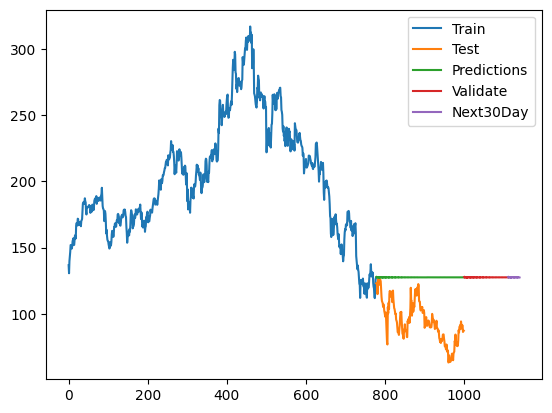

In [ ]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()